<a href="https://colab.research.google.com/drive/10AMqN0CfDzteLmyEF09pg9tUw2K-OEXK?usp=sharing#scrollTo=fGXKDsxkP2CS" target="_blank">Notes</a>

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Loading Data 

In [5]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Cleaning 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## FEATURE ENGINEERING

In [10]:
Male = pd.get_dummies(data["sex"], drop_first=True)
data = pd.concat([data, Male], axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [11]:
Smoker = pd.get_dummies(data["smoker"], drop_first=True)
data = pd.concat([data,Smoker], axis =1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [12]:
data.rename(columns={"yes":"smokers"}, inplace=True)

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,smokers
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [14]:
data["region"].nunique()

4

## EXPLORATORY DATA ANALYSIS 

##### Distributionn of "SEX" parameter

<Axes: xlabel='sex', ylabel='count'>

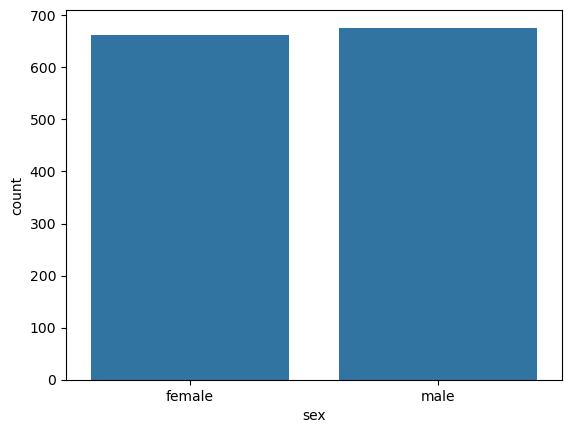

In [17]:
sns.countplot(data=data, x="sex")

##### Relation btw smoking and gender wrt charges 

<Axes: xlabel='sex', ylabel='charges'>

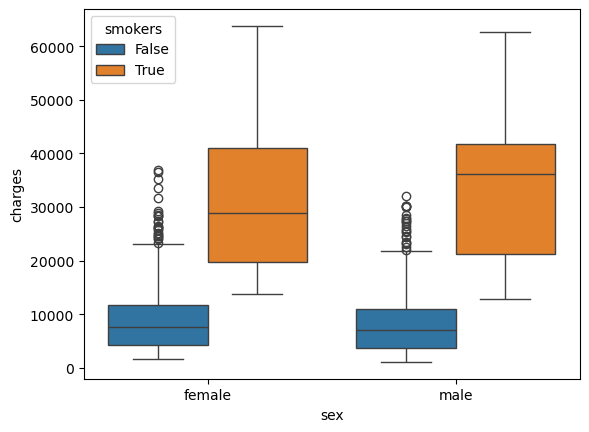

In [19]:
sns.boxplot(data=data, x="sex", y="charges", hue="smokers")

<Axes: xlabel='age', ylabel='charges'>

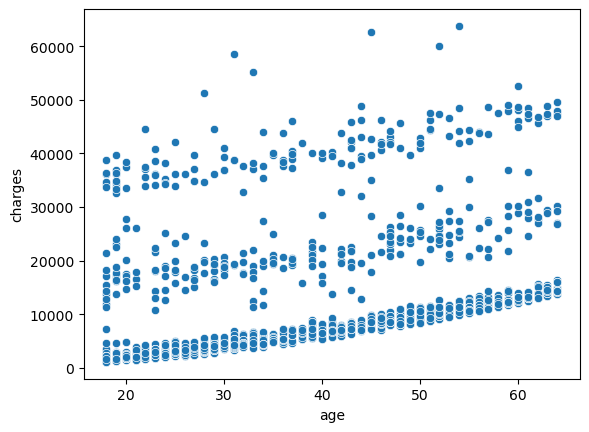

In [20]:
sns.scatterplot(x="age", y="charges", data=data)

<Axes: xlabel='age', ylabel='charges'>

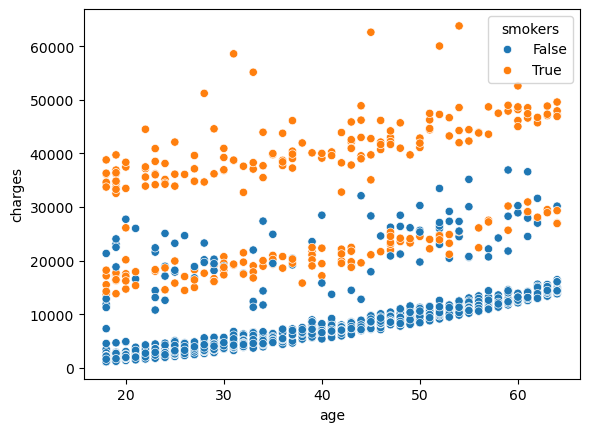

In [21]:
sns.scatterplot(x="age", y="charges", data=data, hue="smokers")

<Axes: xlabel='bmi', ylabel='charges'>

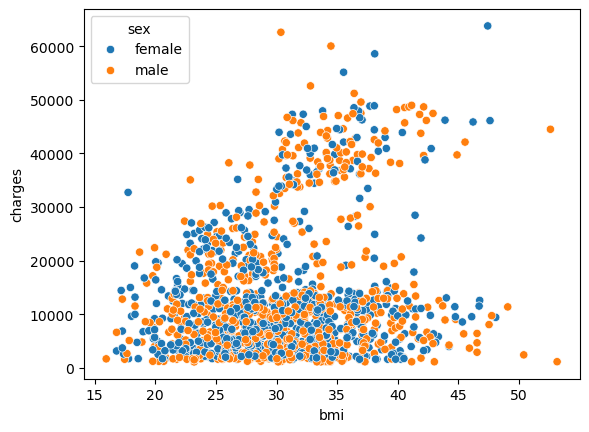

In [22]:
sns.scatterplot(data=data, x="bmi", y="charges", hue="sex")

<Axes: xlabel='bmi', ylabel='charges'>

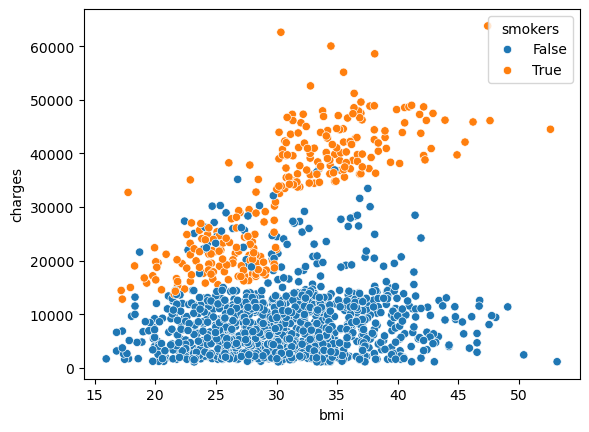

In [23]:
sns.scatterplot(data=data, x="bmi", y="charges", hue="smokers")

<Axes: xlabel='bmi', ylabel='charges'>

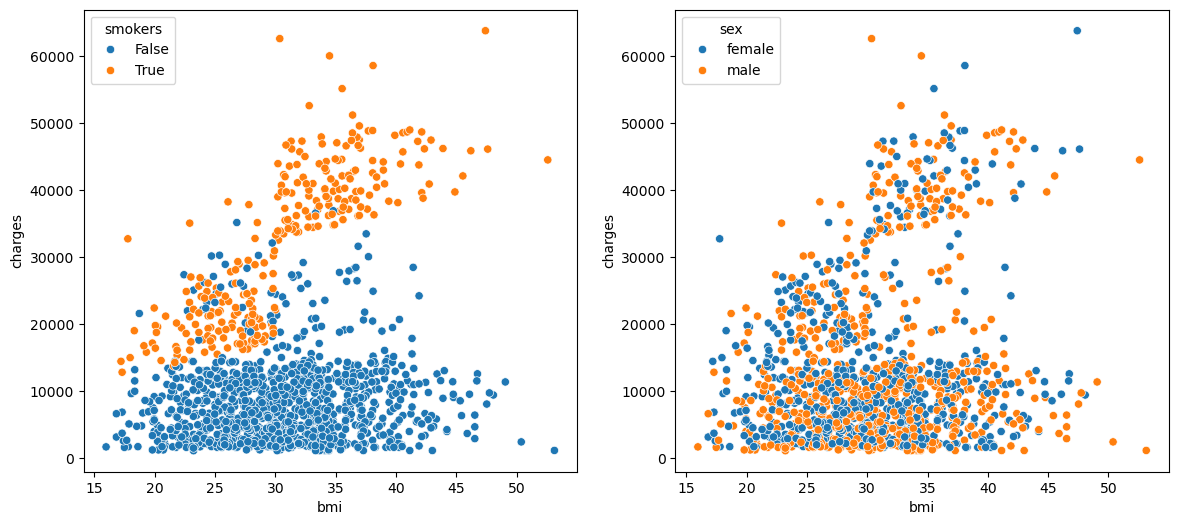

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.scatterplot(data=data, x="bmi", y="charges", hue="smokers", ax= ax[0])
sns.scatterplot(data=data, x="bmi", y="charges", hue="sex", ax= ax[1])

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,smokers
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [26]:
data["male"].value_counts()

male
True     676
False    662
Name: count, dtype: int64

In [60]:
corr_matrix = data[["age", "bmi", "children", "charges", "smokers", "male"]].corr()
corr_matrix

,age,bmi,children,charges,smokers,male
age,1.000000,0.109272,0.042469,0.299008,-0.025019,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.046371
children,0.042469,0.012759,1.000000,0.067998,0.007673,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.057292
smokers,-0.025019,0.003750,0.007673,0.787251,1.000000,0.076185
male,-0.020856,0.046371,0.017163,0.057292,0.076185,1.000000


<Axes: >

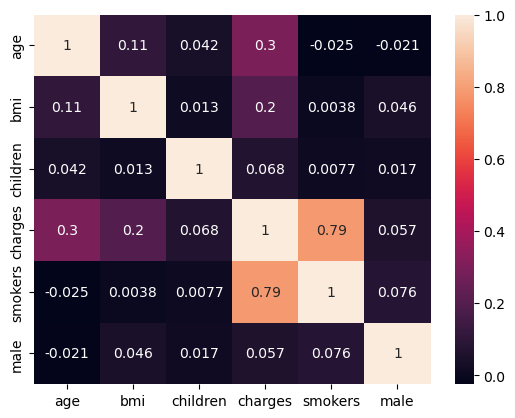

In [28]:
sns.heatmap(corr_matrix, annot=True)

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,smokers
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


###### remove low corrr colms

In [31]:
data.drop(columns=["sex","smoker","region"],inplace =True)
data.head()

,age,bmi,children,charges,male,smokers
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False


# Splitting up the data

In [33]:
x = data.drop("charges", axis=1)
y = data["charges"]

In [34]:
x.head()

,age,bmi,children,male,smokers
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [36]:
x_test.shape

(536, 5)

# Scaling the data

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [40]:
scaled_x_train

array([[ 0.67823962, -0.07579304, -0.92525412,  1.01254754, -0.50311529],
       [ 0.75031438, -0.52969385, -0.09891358,  1.01254754, -0.50311529],
       [ 1.25483766, -0.42678839, -0.92525412,  1.01254754, -0.50311529],
       ...,
       [ 1.25483766, -1.12877911, -0.92525412,  1.01254754, -0.50311529],
       [ 0.02956683, -0.71157327, -0.09891358,  1.01254754, -0.50311529],
       [-0.83533024,  0.41879133, -0.92525412, -0.98760795, -0.50311529]])

# support vector regression model

SVR(kernel='linear')
mean squared error:  78600061.91888203


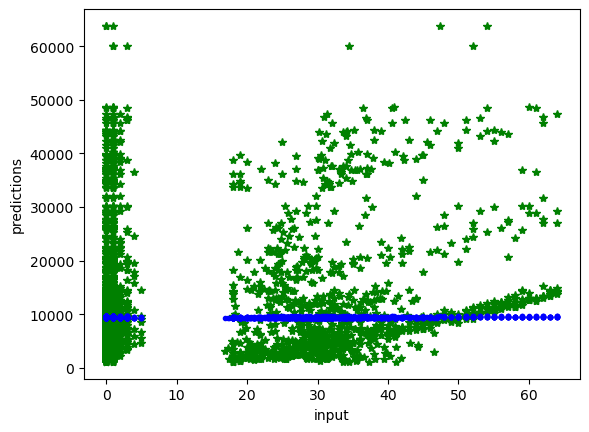

SVR(kernel='poly')
mean squared error:  78600061.91888203


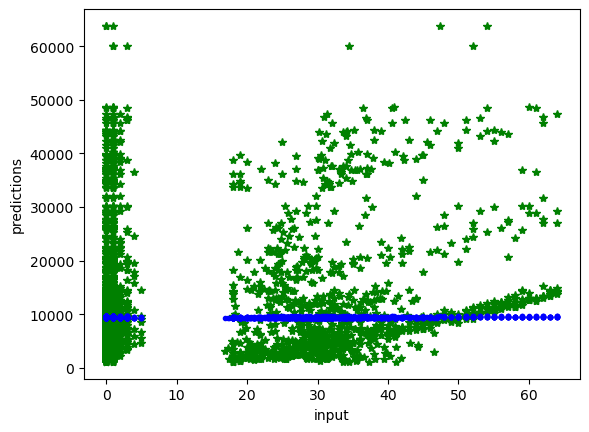

SVR()
mean squared error:  78600061.91888203


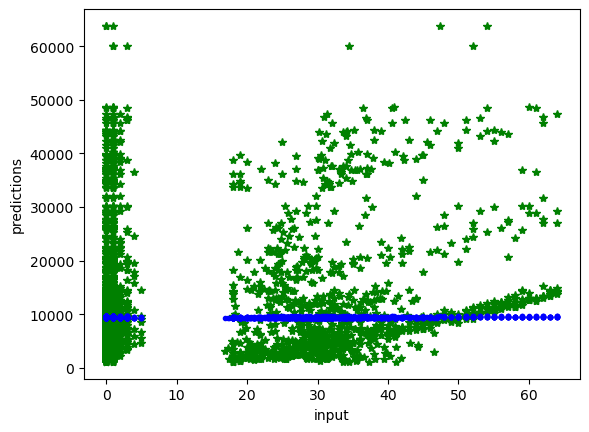

SVR(kernel='sigmoid')
mean squared error:  78600061.91888203


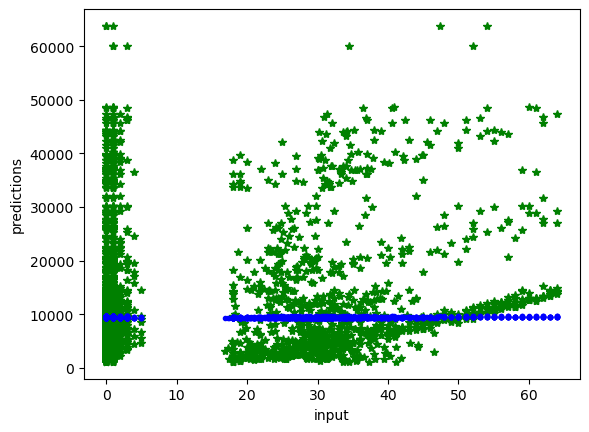

In [58]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
kernels = ["linear", "poly", "rbf", "sigmoid"]

for kernel in kernels:
    model = SVR(kernel=kernel)
    print(model)
    
    predict = regressor.predict(scaled_x_test)
    mse = mean_squared_error(y_test,predict)/2
    print("mean squared error: ", mse)
    
    plt.plot(x_test, y_test, "*", color = "green")
    plt.plot(x_test, predict, ".", color="blue")
    plt.xlabel("input")
    plt.ylabel("predictions")
    plt.show()